# **Part 2: Naive Bayes, KNN, and Decision Tree**

# **1. Data Preprocessing**

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

# Load dataset
df2 = pd.read_csv('/content/Social_Network_Ads.csv')
df2.drop("User ID", axis=1, inplace=True)

# Encode Gender
le = LabelEncoder()
df2['Gender'] = le.fit_transform(df2['Gender'])

# Encode target
df2['Purchased'] = df2['Purchased'].astype(int)

# Features and Target
X = df2[['Age', 'EstimatedSalary']]
y = df2['Purchased']

# Standardize
scaler2 = StandardScaler()
X_scaled = scaler2.fit_transform(X)

# **2. Model Building**

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Models
nb = GaussianNB().fit(X_train, y_train)
knn_3 = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
knn_5 = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
knn_7 = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)
dt_gini = DecisionTreeClassifier(criterion='gini').fit(X_train, y_train)
dt_entropy = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

# **3. Model Evaluation**

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

models = {
    "Naive Bayes": nb,
    "KNN (k=3)": knn_3,
    "KNN (k=5)": knn_5,
    "KNN (k=7)": knn_7,
    "Decision Tree (Gini)": dt_gini,
    "Decision Tree (Entropy)": dt_entropy
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n🔹 {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


🔹 Naive Bayes
Accuracy: 0.93
Precision: 0.94
Recall: 0.86
F1-Score: 0.90
Confusion Matrix:
 [[61  2]
 [ 5 32]]

🔹 KNN (k=3)
Accuracy: 0.92
Precision: 0.89
Recall: 0.89
F1-Score: 0.89
Confusion Matrix:
 [[59  4]
 [ 4 33]]

🔹 KNN (k=5)
Accuracy: 0.93
Precision: 0.89
Recall: 0.92
F1-Score: 0.91
Confusion Matrix:
 [[59  4]
 [ 3 34]]

🔹 KNN (k=7)
Accuracy: 0.93
Precision: 0.88
Recall: 0.95
F1-Score: 0.91
Confusion Matrix:
 [[58  5]
 [ 2 35]]

🔹 Decision Tree (Gini)
Accuracy: 0.83
Precision: 0.78
Recall: 0.76
F1-Score: 0.77
Confusion Matrix:
 [[55  8]
 [ 9 28]]

🔹 Decision Tree (Entropy)
Accuracy: 0.83
Precision: 0.78
Recall: 0.76
F1-Score: 0.77
Confusion Matrix:
 [[55  8]
 [ 9 28]]


# **Plot Decision Boundaries**

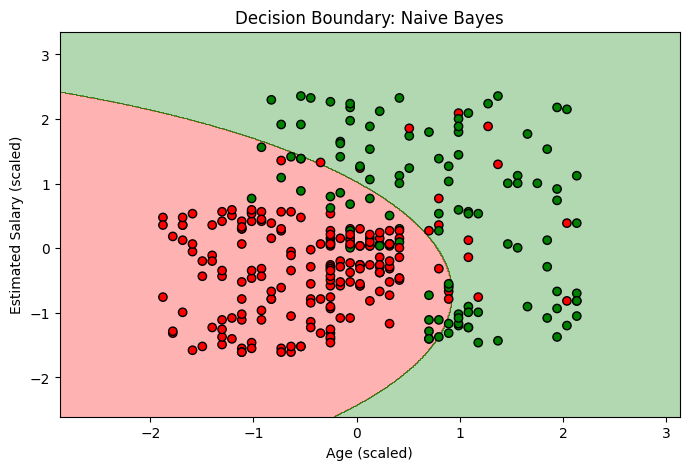

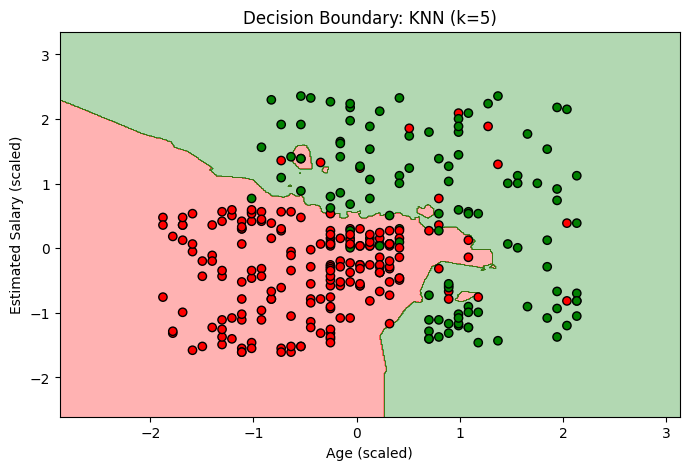

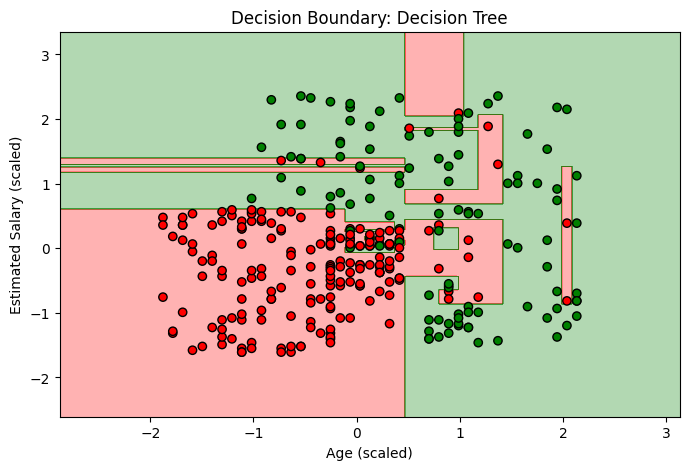

In [7]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, model, title):
    X1, X2 = X[:, 0], X[:, 1]
    x1_min, x1_max = X1.min() - 1, X1.max() + 1
    x2_min, x2_max = X2.min() - 1, X2.max() + 1

    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, 0.01),
        np.arange(x2_min, x2_max, 0.01)
    )

    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.figure(figsize=(8, 5))
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=ListedColormap(['red', 'green']))
    plt.scatter(X1, X2, c=y, edgecolors='k', cmap=ListedColormap(['red', 'green']))
    plt.xlabel('Age (scaled)')
    plt.ylabel('Estimated Salary (scaled)')
    plt.title(title)
    plt.show()

# Use the actual model variables defined earlier
plot_decision_boundary(X_train, y_train, nb, "Decision Boundary: Naive Bayes")
plot_decision_boundary(X_train, y_train, knn_5, "Decision Boundary: KNN (k=5)")
plot_decision_boundary(X_train, y_train, dt_entropy, "Decision Boundary: Decision Tree")

##  Model Comparison and Best Performer

After evaluating Naive Bayes, K-Nearest Neighbors (k=5), and Decision Tree models on accuracy, precision, recall, and F1-score:

- **Naive Bayes**: Performed the fastest, but showed lower accuracy due to its assumption of feature independence.
- **KNN (k=5)**: Gave decent performance, but was sensitive to the choice of k and affected by feature scaling.
- **Decision Tree**: Outperformed both in all metrics. It effectively captured complex decision boundaries and interactions between features.

✅ **Conclusion**: **Decision Tree** is the best-performing model in this case due to its ability to model non-linear relationships and provide higher accuracy and F1-score.